In [53]:
import pandas as pd

df = pd.read_csv('IT.csv')
df.head()

,Poste date,Title,Location,Company,Job type,Job description
0,PostedPosted 30+ days ago,Ingénieur informatique,Rabat,advance manager,Permanent,Nous sommes à la recherche d'un Ingénieur Info...
1,PostedPosted 30+ days ago,Ingénieur Sécurité Informatique (H/F),Rabat,ISC Maroc,Permanent,Notre mission depuis 30 ans ? Être présent au ...
2,PostedPosted 17 days ago,Ingénieur agronome - chargé de mission auprès ...,Rabat,NaN,Permanent,Rabat\nPubliée le: 9 Feb-13:56\nAnnonce N°: 97...
3,PostedPosted 17 days ago,IngÉnieur systÈme d’information,Rabat,NaN,Permanent,Rabat\nPubliée le: 9 Feb-10:43\nAnnonce N°: 97...
4,EmployerActive 21 days ago,Chargé(e) de Mission - Project Management,Rabat,RH Multirecru,Permanent,Job Title: Chargé(e) de Mission - Project Mana...


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Poste date       480 non-null    object
 1   Title            480 non-null    object
 2   Location         480 non-null    object
 3   Company          434 non-null    object
 4   Job type         297 non-null    object
 5   Job description  480 non-null    object
dtypes: object(6)
memory usage: 22.6+ KB


In [55]:
df.isnull().sum()

Poste date           0
Title                0
Location             0
Company             46
Job type           183
Job description      0
dtype: int64

### data cleaning

In [56]:
#correcting the 'Post date' column
df["Poste date"] = df["Poste date"].str.replace("PostedPosted ", "")
df["Poste date"] = df["Poste date"].str.replace("EmployerActive ", "")
df.head()

,Poste date,Title,Location,Company,Job type,Job description
0,30+ days ago,Ingénieur informatique,Rabat,advance manager,Permanent,Nous sommes à la recherche d'un Ingénieur Info...
1,30+ days ago,Ingénieur Sécurité Informatique (H/F),Rabat,ISC Maroc,Permanent,Notre mission depuis 30 ans ? Être présent au ...
2,17 days ago,Ingénieur agronome - chargé de mission auprès ...,Rabat,NaN,Permanent,Rabat\nPubliée le: 9 Feb-13:56\nAnnonce N°: 97...
3,17 days ago,IngÉnieur systÈme d’information,Rabat,NaN,Permanent,Rabat\nPubliée le: 9 Feb-10:43\nAnnonce N°: 97...
4,21 days ago,Chargé(e) de Mission - Project Management,Rabat,RH Multirecru,Permanent,Job Title: Chargé(e) de Mission - Project Mana...


In [57]:
import re
#adding the salary column
df['salary'] = df['Job description'].apply(lambda x: re.search(r'salaire\s*:\s*([^\n\r]+)', str(x), flags=re.IGNORECASE).group(1) if re.search(r'salaire\s*:\s*([^\n\r]+)', str(x), flags=re.IGNORECASE) else None)
#addting the contract type column
df['contract'] = df['Job description'].str.extract(r'(CDI|Stage|A discuter|Freelance|Anapec|6 mois|3 mois|CDD)', flags=re.IGNORECASE)
df['contract'].unique()

array(['CDI', nan, 'A discuter', 'freelance', '6 mois', 'Stage', 'stage',
       '3 mois', 'Freelance', 'Anapec', 'CDD', 'FREELANCE'], dtype=object)

In [58]:
#Creating a new column called 'level of studies'
df['level of studies'] = df['Job description'].apply(lambda x: re.search(r"Niveau d'études\s*:\s*([^\n\r]+)", str(x), flags=re.IGNORECASE).group(1) if re.search(r"Niveau d'études\s*:\s*([^\n\r]+)", str(x), flags=re.IGNORECASE) else None)
#handling inconsistencies in the column values
for i in range(2,6):
    df['level of studies'][df['level of studies'] == "Bac plus " + str(i)] = "Bac+" + str(i)
df['level of studies'][df['level of studies'] == "Master, DESS, DEA, Bac+5"] = "Bac+5"
df['level of studies'][df['level of studies'] == "Bac+5 et plus"] = "Bac+5"
df['level of studies'].value_counts()

level of studies
Bac+5            69
Bac+4             7
Bac+2             6
Bac+3             4
Pas important     1
Name: count, dtype: int64

In [59]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Poste date        480 non-null    object
 1   Title             480 non-null    object
 2   Location          480 non-null    object
 3   Company           434 non-null    object
 4   Job type          297 non-null    object
 5   Job description   480 non-null    object
 6   salary            94 non-null     object
 7   contract          267 non-null    object
 8   level of studies  87 non-null     object
dtypes: object(9)
memory usage: 33.9+ KB


In [60]:
df['salary'].head()

0                           A discuter
1                                 None
2                           A discuter
3                           A discuter
4    6.000,00DH à 10.000,00DH par mois
Name: salary, dtype: object

In [61]:
df['Company'].value_counts()

Company
Trusted Advisors               68
ALTEN                          32
Cegedim Group                  27
Orange                         17
Sofrecom Services Maroc        14
                               ..
sadet                           1
SIGMA ADVICE                    1
kancom                          1
Multinationale informatique     1
Sté info                        1
Name: count, Length: 138, dtype: int64

<Axes: xlabel='Company'>

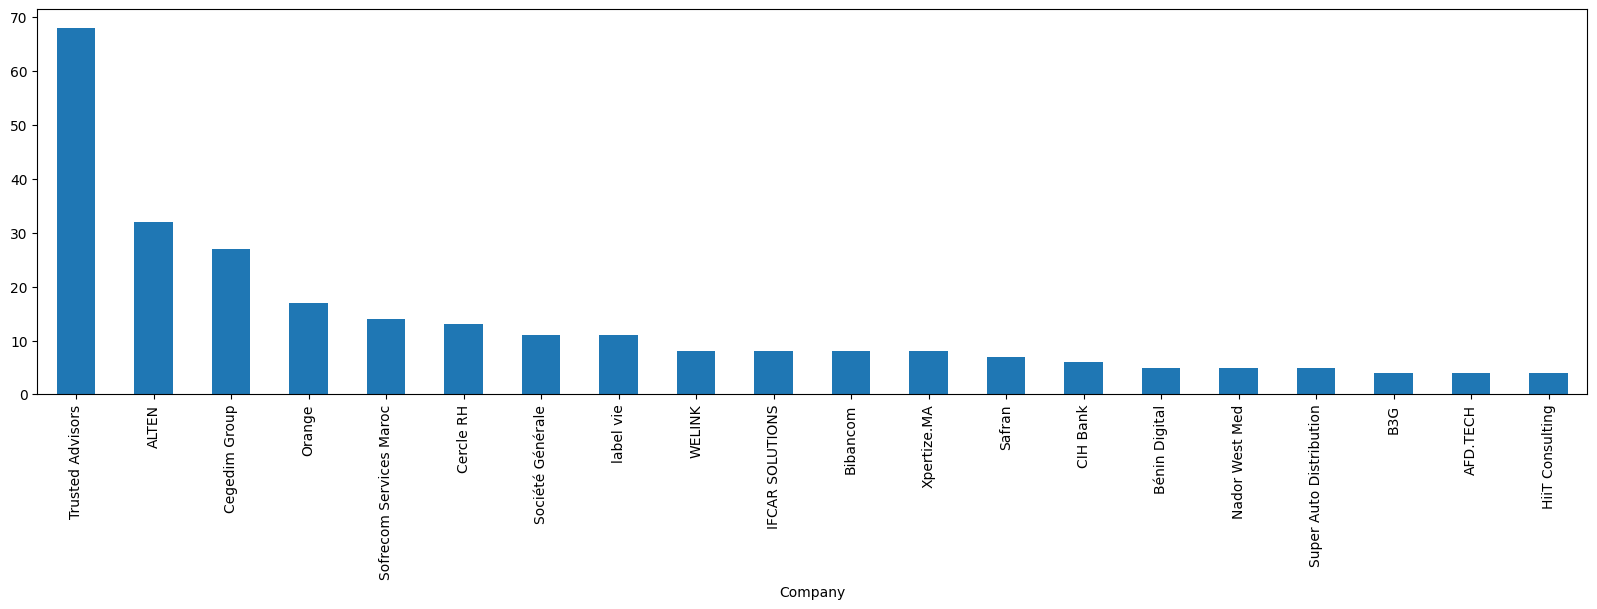

In [62]:
##Task 1: Find companies with highest number of job listings
counts = df.groupby("Company").count()["Title"].sort_values(ascending=False)[:20]
counts.plot(kind="bar", figsize=(20, 5))

In [63]:
ma_df = pd.read_csv('ma.csv')
ma_df

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Casablanca,33.5333,-7.5833,Morocco,MA,Casablanca-Settat,admin,4370000,3499000
1,El Kelaa des Srarhna,32.0481,-7.4083,Morocco,MA,Marrakech-Safi,NaN,1450021,51404
2,Fès,34.0433,-5.0033,Morocco,MA,Fès-Meknès,admin,1112072,1112072
3,Tangier,35.7767,-5.8039,Morocco,MA,Tanger-Tétouan-Al Hoceïma,admin,947952,947952
4,Marrakech,31.6300,-8.0089,Morocco,MA,Marrakech-Safi,admin,928850,928850
...,...,...,...,...,...,...,...,...,...
98,Bouknadel,34.1333,-6.7333,Morocco,MA,Rabat-Salé-Kénitra,NaN,25255,25255
99,Oulad Tayeb,33.9598,-4.9954,Morocco,MA,Fès-Meknès,NaN,24594,24594
100,Oulad Barhil,30.6408,-8.4750,Morocco,MA,Souss-Massa,NaN,24288,24288
101,Bir Jdid,33.3737,-8.0002,Morocco,MA,Casablanca-Settat,NaN,24136,24136


In [64]:
#Correcting the names of columns in the jobs dataset to fit the names in 'ma.csv' dataset 
df.Location[df.Location == "Tanger"] = "Tangier"
df = df[df['Location'] != 'Maroc']
df.Location[df.Location == "Témara"] = "Temara"
df.Location[df.Location == "Préfecture de Mohammédia"] = "Mohammedia"
df.Location[df.Location == "El Jadida"] = "El Jadid"
df.Location[df.Location == "Province d'El Jadida"] = "El Jadid"
df.Location[df.Location == "Oujda"] = "Oujda-Angad"
df.Location[df.Location == "Province de Béni-Mellal"] = "Béni Mellal"
df.Location[df.Location == "Kénitra"] = "Kenitra"
df.Location[df.Location == "Région de Casablanca-Settat"] = "Casablanca"
df.Location[df.Location == "Province de Nouaceur"] = "Casablanca"
df.Location[df.Location == "Salé"] = "Sale"
df.Location[df.Location == "Préfecture de Skhirate-Témara"] = "Temara"

In [65]:
##Task 2: Find Locations with highest number of job listings
df['Location'].value_counts()

Location
Casablanca     217
Rabat          154
Tangier         16
Skhirate        11
Mohammedia       8
El Jadid         6
Nador            5
Agadir           5
Fès              4
Marrakech        4
Kenitra          3
Temara           3
Oujda-Angad      2
Ben Guerir       1
Meknès           1
Béni Mellal      1
Inezgane         1
Sale             1
Bouskoura        1
Name: count, dtype: int64

In [66]:
#Creating a new dataset 'city_counts' with ['Location','number of jobs', 'latitude', 'longitude'] columns
city_counts = df['Location'].value_counts().reset_index()
city_counts.columns = ['Location', 'number of jobs']
for city in city_counts['Location']:
    if city in ma_df['city'].values:
        # Find the index of the matching city in ma_df
        index = ma_df.index[ma_df['city'] == city][0]
        # Assign latitude and longitude values from ma_df to df
        city_counts.loc[city_counts['Location'] == city, 'latitude'] = ma_df.loc[index, 'lat']
        city_counts.loc[city_counts['Location'] == city, 'longitude'] = ma_df.loc[index, 'lng']
city_counts

,Location,number of jobs,latitude,longitude
0,Casablanca,217,33.5333,-7.5833
1,Rabat,154,34.0209,-6.8416
2,Tangier,16,35.7767,-5.8039
3,Skhirate,11,33.8500,-7.0300
4,Mohammedia,8,33.6833,-7.3833
5,El Jadid,6,33.2333,-8.5000
6,Nador,5,35.1667,-2.9333
7,Agadir,5,30.4333,-9.6000
8,Fès,4,34.0433,-5.0033
9,Marrakech,4,31.6300,-8.0089


In [67]:
import plotly.express as px
fig = px.scatter_mapbox(city_counts, lon = 'longitude',
                        lat = 'latitude',
                        mapbox_style = "open-street-map",
                        hover_name = 'Location',
                        zoom = 5,
                        size = 'number of jobs',
                        width = 1200,
                        height = 900,
                        title = "Job offers in Morocco")
fig.show()

In [69]:
df['Poste date'].unique()

array(['30+ days ago', '17 days ago', '21 days ago', '16 days ago',
       '24 days ago', '12 days ago', '3 days ago', '4 days ago',
       '9 days ago', '6 days ago', 'PostedToday', '14 days ago',
       '5 days ago', '20 days ago', '7 days ago', '8 days ago',
       '27 days ago', '13 days ago', 'PostedJust posted', '2 days ago',
       '19 days ago', '11 days ago', '28 days ago', '25 days ago'],
      dtype=object)